In [1]:
import pandas as pd
import os
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import proplot as pplt
from natsort import natsorted
import torch
from tqdm import tqdm
from twaidata.torchdatasets.DirectoryParser3DMRIDataset import *
from trustworthai.journal_run.evaluation.new_scripts.eval_helper_functions import *

In [2]:
file_path = "/home/s2208943/ipdis/data/MSS3_Maria_analysis/WMH_inter_observer_voxelwise_analysis/Voxelwise_agreement.xlsx"

In [3]:
df = pd.read_excel(file_path)

In [4]:
df

,Dataset ID,WMH1_mm3,WMH2_mm3,ICV_mm3,JI,DSC,TPF_1,TPF_2,TNF_1,TNF_2
0,MSS3_ED_001_V1,6825,6578,1886164,0.517206,0.681788,0.669451,0.694588,0.998931,0.998800
1,MSS3_ED_001_V2a,11215,13999,1886164,0.758789,0.862854,0.969951,0.777056,0.998335,0.999820
2,MSS3_ED_001_V2b,11452,13947,1886164,0.752018,0.858459,0.951973,0.781673,0.998376,0.999706
3,MSS3_ED_001_V3,12023,14612,1886164,0.734049,0.846630,0.937786,0.771626,0.998219,0.999600
4,MSS3_ED_002_V1,56156,56042,2393629,0.885681,0.939375,0.938422,0.940330,0.998569,0.998521
...,...,...,...,...,...,...,...,...,...,...
57,MSS3_ED_075_V1,6657,6738,1954902,0.062758,0.118104,0.118822,0.117394,0.996948,0.996989
58,MSS3_ED_077_V1,2712,3266,2113593,0.827576,0.905654,0.998156,0.828843,0.999735,0.999998
59,MSS3_ED_078_V1,8459,10288,1742275,0.031983,0.061983,0.068684,0.056474,0.994401,0.995451
60,MSS3_ED_079_V1,6110,6956,1560672,0.030442,0.059085,0.063175,0.055492,0.995774,0.996316


Text(0.5, 1.0, 'Rater 1 volume vs Rater 2 volume')

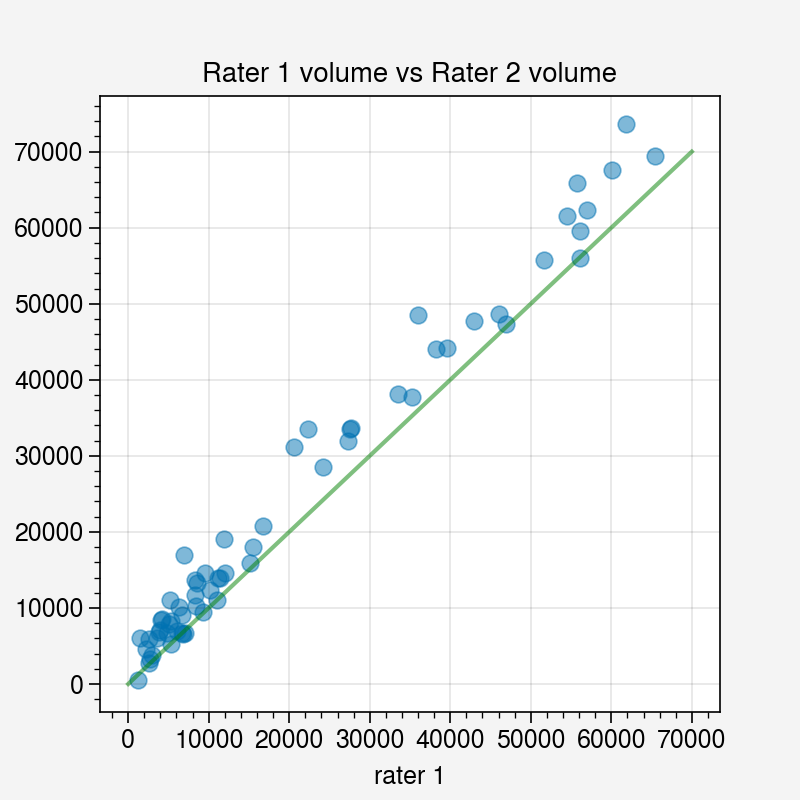

In [5]:
plt.plot([0, 70000], [0, 70000], c='green', alpha=0.5)
plt.scatter(df["WMH1_mm3"], df["WMH2_mm3"], alpha=0.5)
plt.xlabel("rater 1")
plt.ylabel("rater 2")
plt.title("Rater 1 volume vs Rater 2 volume")

Text(0, 0.5, 'Dice between raters')

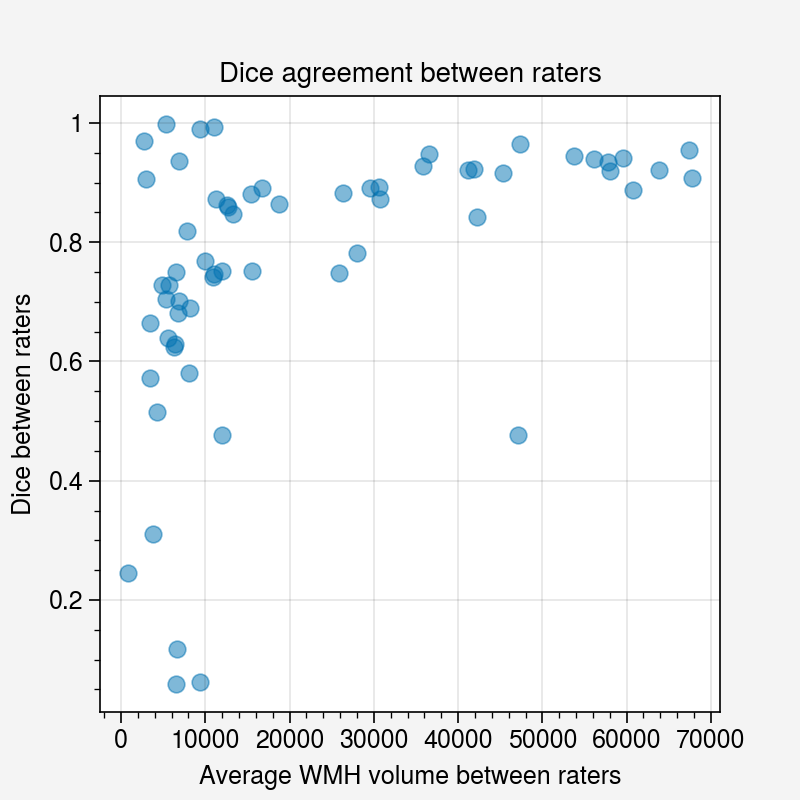

In [6]:
plt.scatter((df["WMH1_mm3"] + df["WMH2_mm3"]) / 2, df["DSC"], alpha=0.5)
plt.title("Dice agreement between raters")
plt.xlabel("Average WMH volume between raters")
plt.ylabel("Dice between raters")

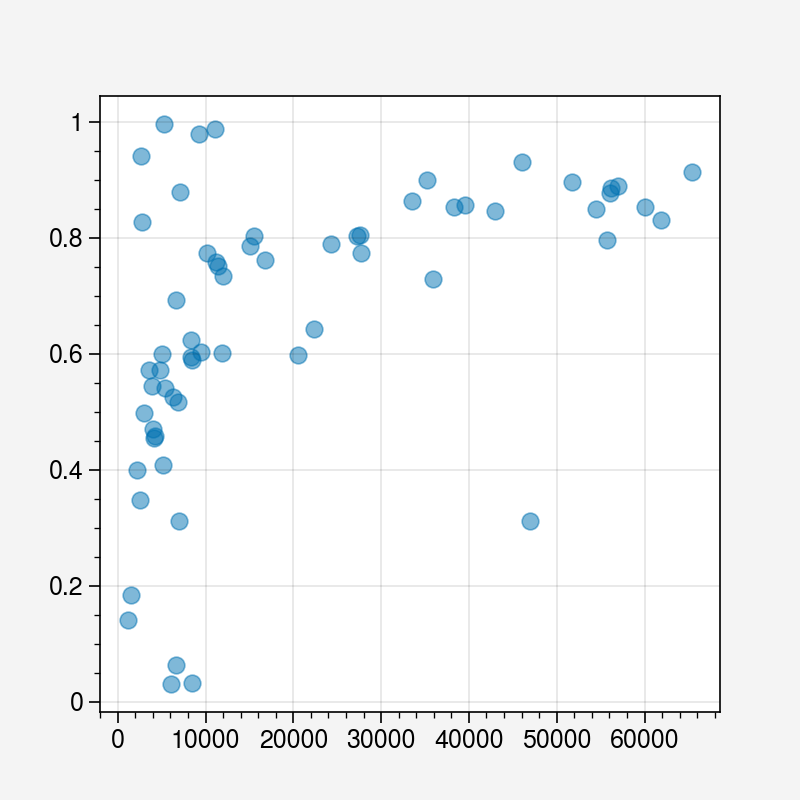

In [7]:
plt.scatter(df["WMH1_mm3"], df["JI"], alpha=0.5)

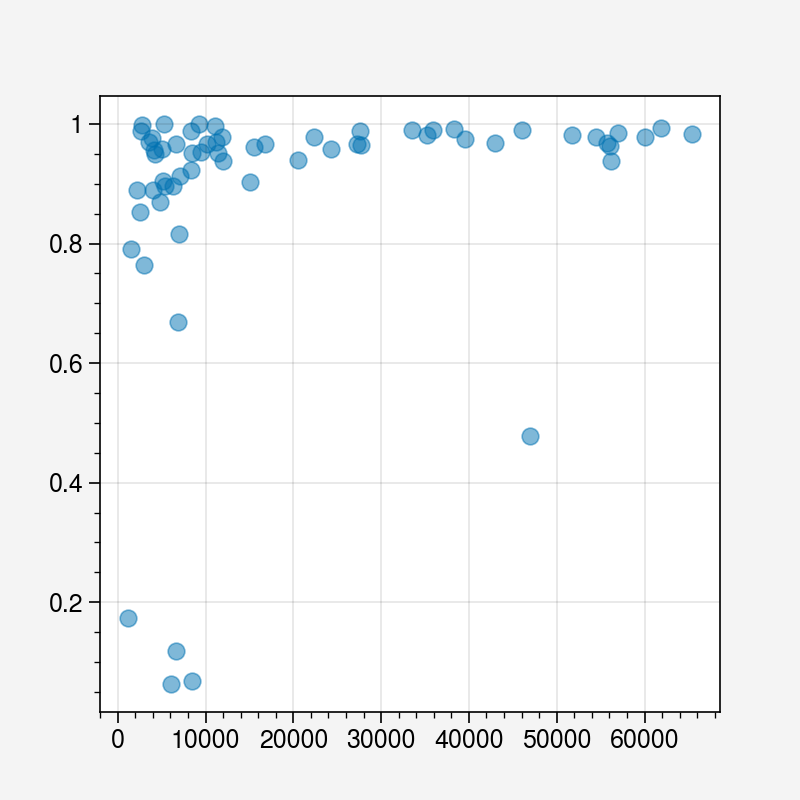

In [8]:
plt.scatter(df["WMH1_mm3"], df["TPF_1"], alpha=0.5)

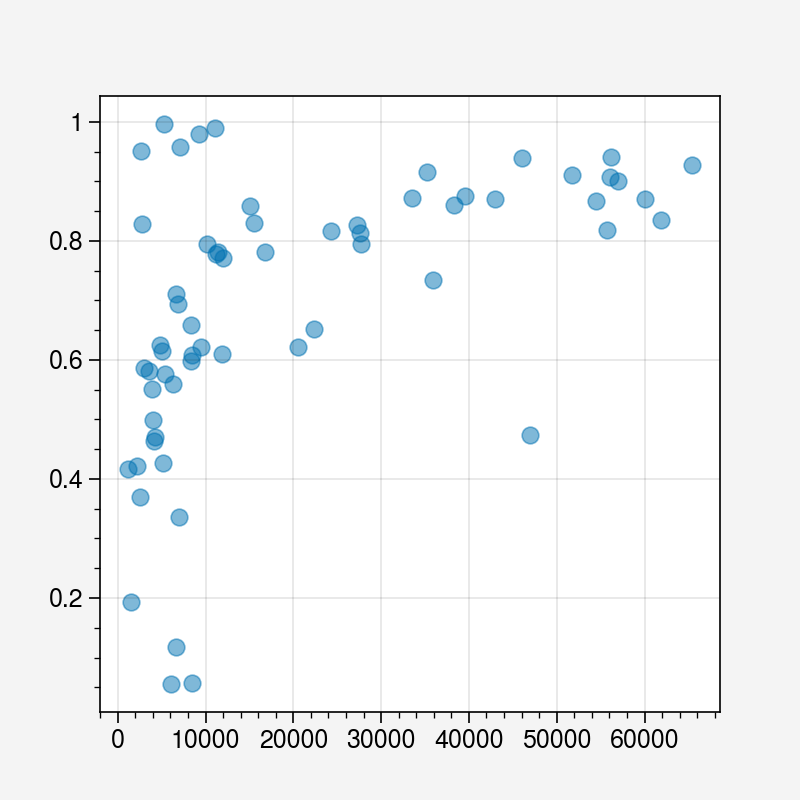

In [9]:
plt.scatter(df["WMH1_mm3"], df["TPF_2"], alpha=0.5)

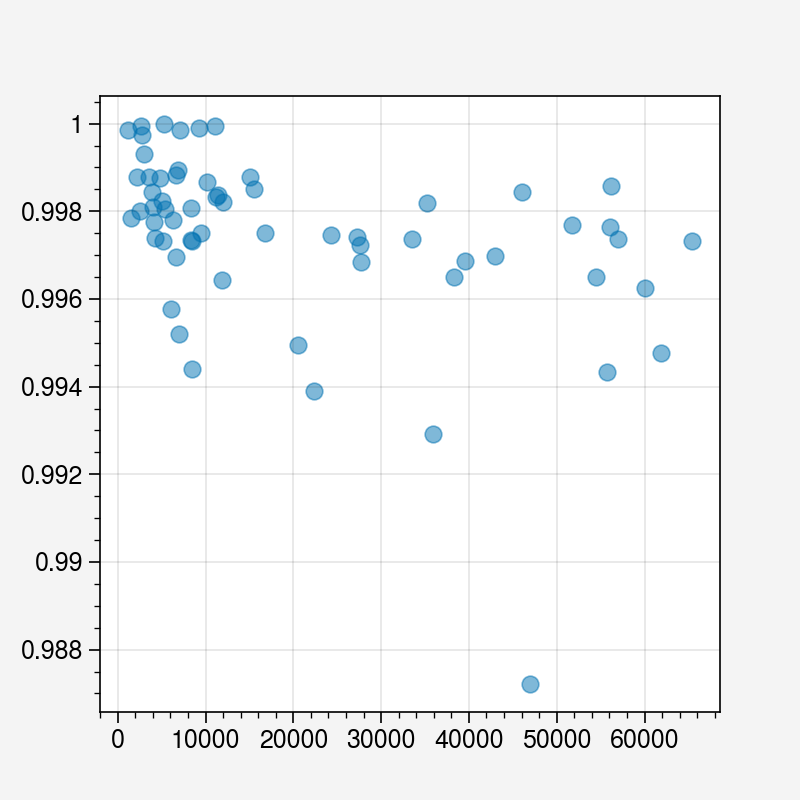

In [10]:
plt.scatter(df["WMH1_mm3"], df["TNF_1"], alpha=0.5)

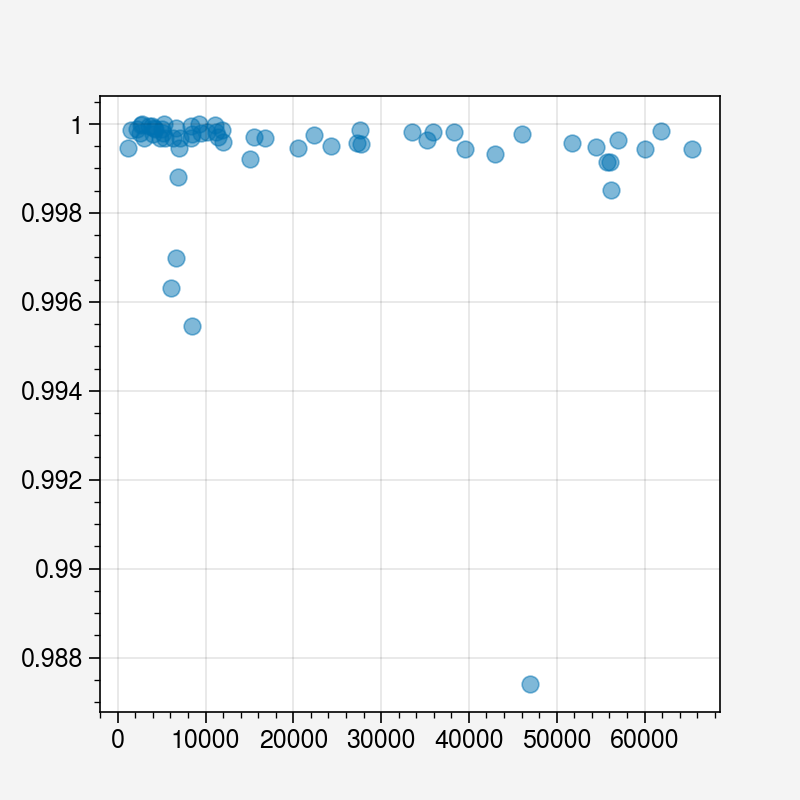

In [11]:
plt.scatter(df["WMH1_mm3"], df["TNF_2"], alpha=0.5)

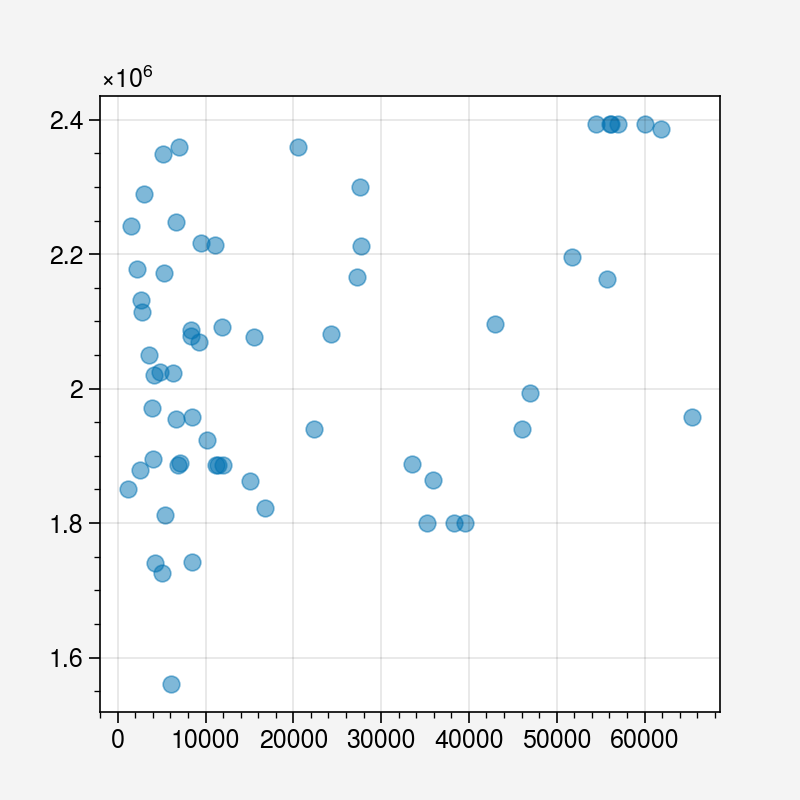

In [12]:
plt.scatter(df["WMH1_mm3"], df["ICV_mm3"], alpha=0.5)

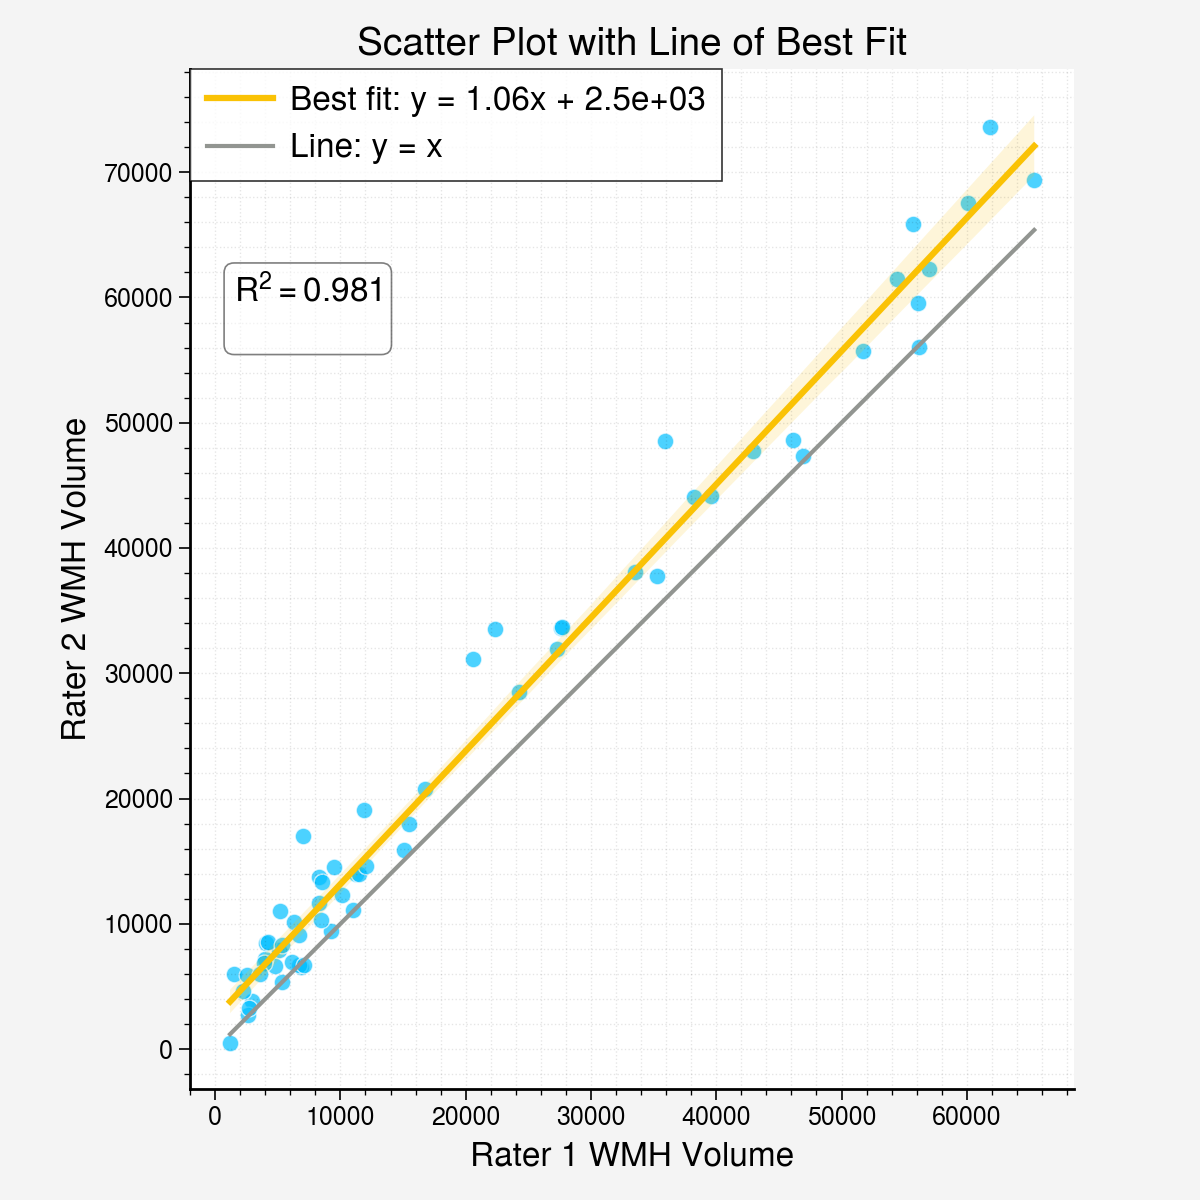

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Example data
x = df["WMH1_mm3"]
y = df["WMH2_mm3"]

# Calculate line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

# Create scatter plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, color='deepskyblue', alpha=0.7, edgecolors='w', linewidth=0.5)

# Plot line of best fit
#plt.plot(x.values, line.values, color='goldenrod', label=f'Best fit: y = {slope:.2f}x + {intercept:.2}')
sns.regplot({'x':x.values, 'y':y.values}, x='x', y='y', ax=ax, scatter=False, ci=97, color='goldenrod', label=f'Best fit: y = {slope:.2f}x + {intercept:.2}')
plt.plot([min(x), max(x)], [min(x), max(x)], color='gray', label=f'Line: y = x')

# Annotate with text (R^2 and line equation)
plt.text(0.05, 0.80, f'$R^2 = {r_value**2:.3f}$\n', transform=plt.gca().transAxes,
         fontsize=12,  verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Enhance aesthetics
plt.title('Scatter Plot with Line of Best Fit', fontsize=14, )
plt.xlabel('Rater 1 WMH Volume', fontsize=12, )
plt.ylabel('Rater 2 WMH Volume', fontsize=12, )
plt.legend(fontsize=12)

plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()


# Remove right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make left and bottom spines thicker
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.set_aspect('equal', adjustable='box')

plt.tight_layout()    

# Show plot
plt.show()


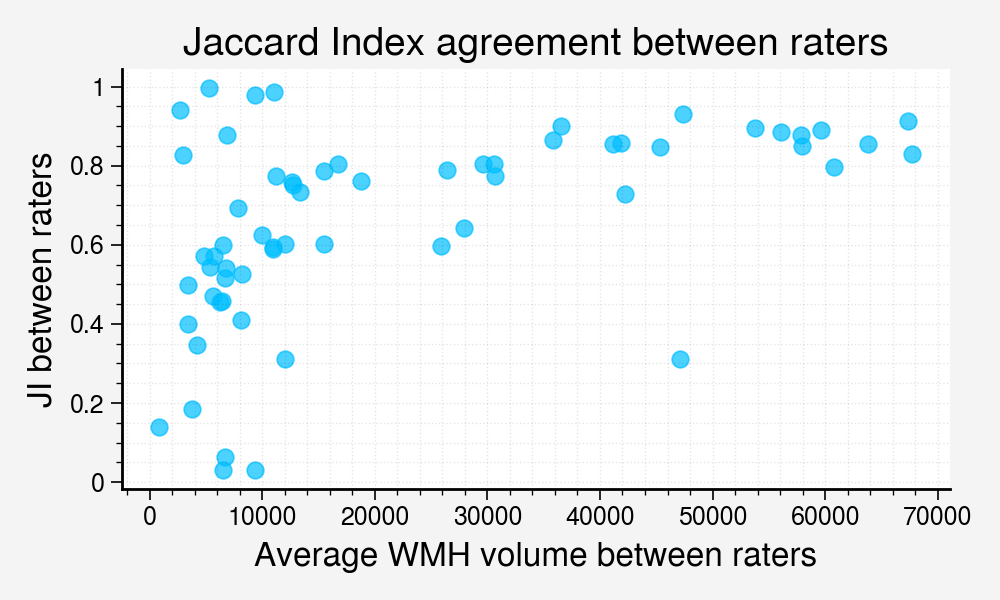

In [14]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(5, 3))
y = df["JI"]
x = (df["WMH1_mm3"] + df["WMH2_mm3"]) / 2
ax.scatter(x, y, alpha=0.7, c='deepskyblue')

# annotation
plt.title("Jaccard Index agreement between raters", fontsize=14)
plt.xlabel("Average WMH volume between raters", fontsize=12)
plt.ylabel("JI between raters", fontsize=12)

# grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()


# Remove right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# # Make left and bottom spines thicker
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

plt.tight_layout()

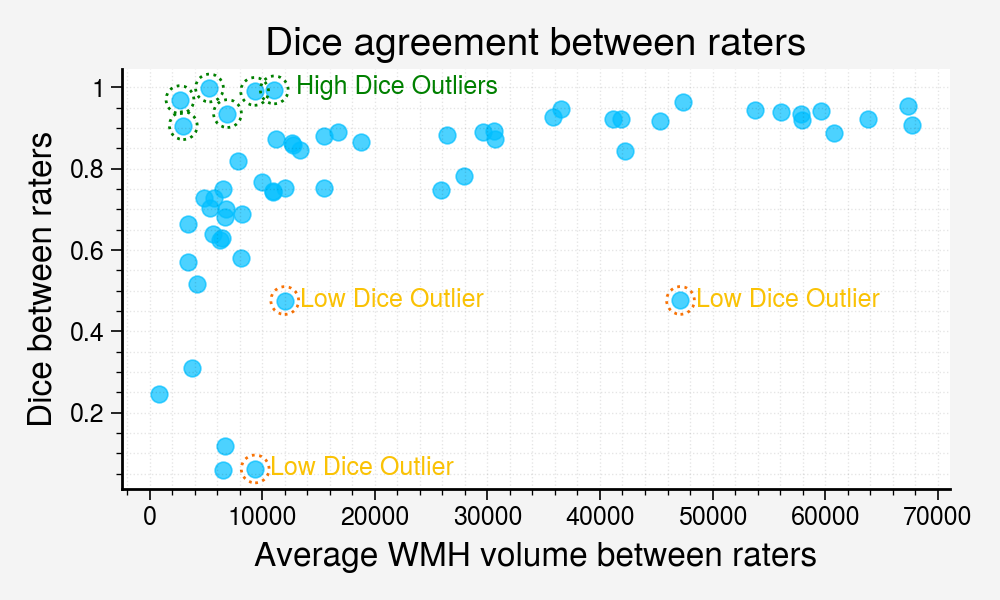

In [15]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(5, 3))
y = df["DSC"]
x = (df["WMH1_mm3"] + df["WMH2_mm3"]) / 2
ax.scatter(x, y, alpha=0.7, c='deepskyblue')

# annotation
plt.title("Dice agreement between raters", fontsize=14)
plt.xlabel("Average WMH volume between raters", fontsize=12)
plt.ylabel("Dice between raters", fontsize=12)

# point out influential outliers
for (xi, yi) in zip(x, y):
    if xi > 8000 and yi < 0.5:
        scatter = ax.scatter(xi, yi, facecolors='none', edgecolors='orange', linewidth=1, s=100, linestyle=':')
        ax.text(xi + max(x) * 0.02, yi, 'Low Dice Outlier', verticalalignment='center', horizontalalignment='left', color='goldenrod')
for (xi, yi) in zip(x, y):
    if xi < 15000 and yi > 0.9:
        scatter = ax.scatter(xi, yi, facecolors='none', edgecolors='green', linewidth=1, s=100, linestyle=':')
        # ax.text(xi + max(x) * 0.02, yi, 'Low Dice Outlier', verticalalignment='center', horizontalalignment='left')
ax.text(13000, 1, 'High Dice Outliers', verticalalignment='center', horizontalalignment='left', color='green')

# grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()


# Remove right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# # Make left and bottom spines thicker
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

plt.tight_layout()

In [16]:
np.where(((y < 0.5) * (x > 8000)).values)

(array([22, 56, 59]),)

In [17]:
df.iloc[[22, 56, 59]]

,Dataset ID,WMH1_mm3,WMH2_mm3,ICV_mm3,JI,DSC,TPF_1,TPF_2,TNF_1,TNF_2
22,MSS3_ED_016_V1,6993,17005,2359501,0.312227,0.475873,0.816531,0.335784,0.995199,0.999452
56,MSS3_ED_073_V1,46966,47337,1993830,0.312407,0.476082,0.477963,0.474217,0.987216,0.987404
59,MSS3_ED_078_V1,8459,10288,1742275,0.031983,0.061983,0.068684,0.056474,0.994401,0.995451


In [18]:
df.iloc[[22, 56, 59]]['Dataset ID'].values

array(['MSS3_ED_016_V1', 'MSS3_ED_073_V1', 'MSS3_ED_078_V1'], dtype=object)

In [19]:
np.where(((y > 0.9) * (x < 15000)).values)

(array([49, 50, 54, 55, 58, 61]),)

In [20]:
df.iloc[[49, 50, 54, 55, 58, 61]]

,Dataset ID,WMH1_mm3,WMH2_mm3,ICV_mm3,JI,DSC,TPF_1,TPF_2,TNF_1,TNF_2
49,MSS3_ED_043_V1,11030,11102,2213066,0.987071,0.993494,0.996736,0.990272,0.999951,0.999984
50,MSS3_ED_044_V1,5303,5323,2172630,0.996243,0.998118,1.000000,0.996243,0.999991,1.000000
54,MSS3_ED_070_V1,9231,9420,2068806,0.979726,0.989759,0.999892,0.979830,0.999908,1.000000
55,MSS3_ED_071_V1,2639,2745,2131459,0.940880,0.969539,0.989011,0.950820,0.999937,0.999986
58,MSS3_ED_077_V1,2712,3266,2113593,0.827576,0.905654,0.998156,0.828843,0.999735,0.999998
61,MSS3_ED_080_V1,7076,6751,1889192,0.878413,0.935272,0.913793,0.957784,0.999849,0.999676


In [21]:
df.iloc[[49, 50, 54, 55, 58, 61]]['Dataset ID'].values

array(['MSS3_ED_043_V1', 'MSS3_ED_044_V1', 'MSS3_ED_070_V1',
       'MSS3_ED_071_V1', 'MSS3_ED_077_V1', 'MSS3_ED_080_V1'], dtype=object)

In [22]:
### low dice
df.iloc[np.where(df['DSC'] < 0.7)]['Dataset ID'].values

array(['MSS3_ED_001_V1', 'MSS3_ED_007_V1', 'MSS3_ED_009_V1',
       'MSS3_ED_012_V1', 'MSS3_ED_014_V1', 'MSS3_ED_016_V1',
       'MSS3_ED_018_V1', 'MSS3_ED_023_V1', 'MSS3_ED_024_V1',
       'MSS3_ED_027_V1', 'MSS3_ED_036_V1', 'MSS3_ED_039_V1',
       'MSS3_ED_073_V1', 'MSS3_ED_075_V1', 'MSS3_ED_078_V1',
       'MSS3_ED_079_V1'], dtype=object)

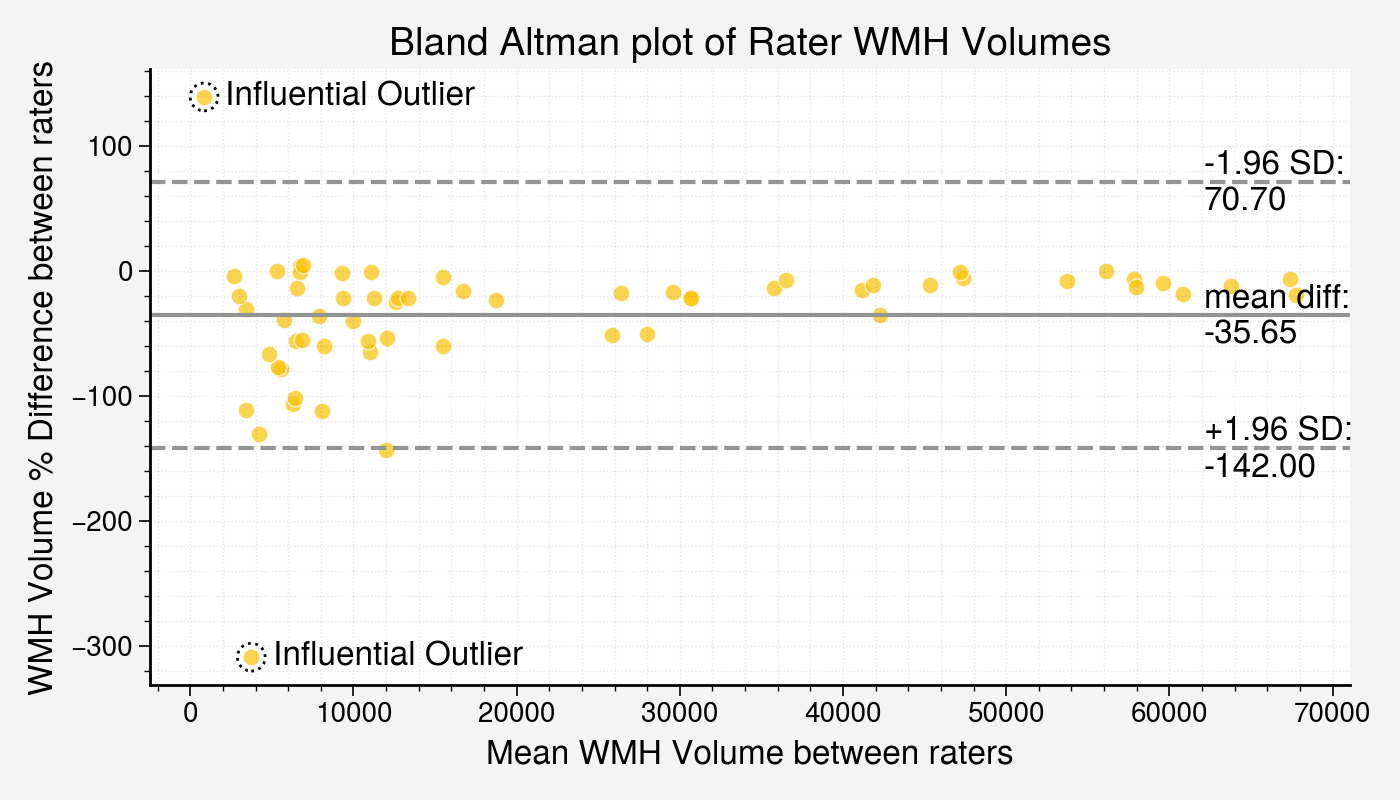

In [23]:
x = df["WMH1_mm3"]
y = df["WMH2_mm3"]
diff = (x - y)
percent_diff = 100 * diff / np.minimum(x, y)
mean_percent_diff = np.mean(percent_diff)
mean = (x + y) / 2
std = np.std(percent_diff, ddof=1)
conf_bound_95 = 1.96 * std

fontsize = 12

fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(mean, percent_diff, color='goldenrod', alpha=0.7, edgecolors='w', linewidth=0.5)

# mean and 95% confidence lines
ax.axhline(y=mean_percent_diff, color='gray')
rhs_point = max(x) * 0.95
ax.text(rhs_point, mean_percent_diff + 1, 'mean diff:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.text(rhs_point, mean_percent_diff - 3, f'{mean_percent_diff:.2f}', verticalalignment='top', horizontalalignment='left', fontsize=fontsize)
ax.axhline(y=mean_percent_diff - conf_bound_95, color='gray', linestyle='--')
ax.text(rhs_point, mean_percent_diff - conf_bound_95 + 1, '+1.96 SD:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.text(rhs_point, mean_percent_diff - conf_bound_95 - 3, f'{mean_percent_diff - conf_bound_95:.2f}', verticalalignment='top', horizontalalignment='left', fontsize=fontsize)
ax.axhline(y=mean_percent_diff + conf_bound_95, color='gray', linestyle='--')
ax.text(rhs_point, mean_percent_diff + conf_bound_95 + 1, '-1.96 SD:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.text(rhs_point, mean_percent_diff + conf_bound_95 - 3, f'{mean_percent_diff + conf_bound_95:.2f}', verticalalignment='top', horizontalalignment='left', fontsize=fontsize)

# point out influential outliers
outlier_sd = 3
for (m, pd) in zip(mean, percent_diff):
    if pd > mean_percent_diff + (3 * std) or pd < mean_percent_diff - (3 * std):
        scatter = ax.scatter(m, pd, facecolors='none', edgecolors='black', linewidth=1, s=100, linestyle=':')
        ax.text(m + max(x) * 0.02, pd, 'Influential Outlier', verticalalignment='center', horizontalalignment='left', fontsize=fontsize)

# spines and ticks
ax = plt.gca() # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)
plt.minorticks_on()
ax.tick_params(axis='both', labelsize=fontsize-2)

# legend
# plt.legend(fontsize=12)

# grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)


plt.title("Bland Altman plot of Rater WMH Volumes", fontsize=fontsize+2)
plt.ylabel("WMH Volume % Difference between raters", fontsize=fontsize)
plt.xlabel("Mean WMH Volume between raters", fontsize=fontsize)

plt.tight_layout()

In [24]:
np.where((percent_diff > mean_percent_diff + (3 * std)) | (percent_diff < mean_percent_diff - (3 * std)))

(array([15, 42]),)

In [25]:
df.iloc[[15, 42]]

,Dataset ID,WMH1_mm3,WMH2_mm3,ICV_mm3,JI,DSC,TPF_1,TPF_2,TNF_1,TNF_2
15,MSS3_ED_009_V1,1469,6007,2242243,0.184223,0.311129,0.791695,0.193607,0.997838,0.999863
42,MSS3_ED_036_V1,1193,499,1850185,0.140162,0.245863,0.174350,0.416834,0.999843,0.999467


In [26]:
df.iloc[[15, 42]]['Dataset ID'].values

array(['MSS3_ED_009_V1', 'MSS3_ED_036_V1'], dtype=object)

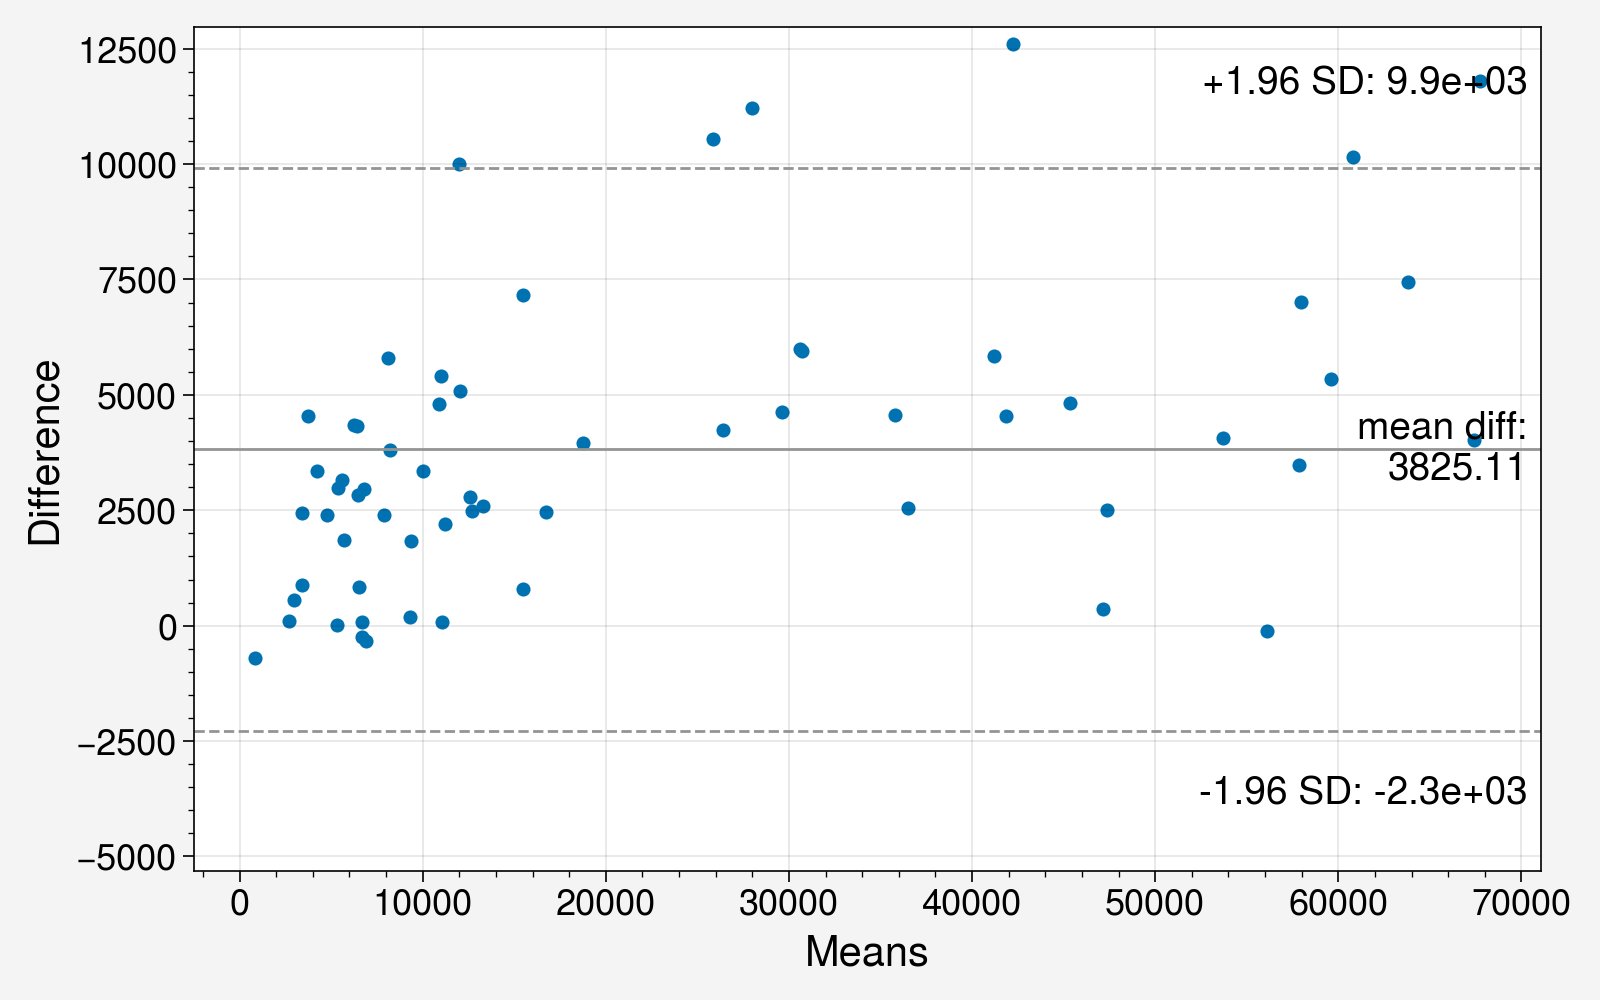

In [27]:
import statsmodels.api as sm
#create Bland-Altman plot                  
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(y, x, ax = ax)

#display Bland-Altman plot
plt.show()

In [28]:
np.mean(x-y)

-3825.1129032258063

In [29]:
sem = np.std(x-y, ddof=1) / np.sqrt(len(x))

In [30]:
sem

398.2267311532356

In [31]:
-1.96 * np.std(y-x, ddof=1) + np.mean(y-x)

-2320.7423135896147

In [32]:
len(x)

62

### plot for publication

In [33]:
def rater_volume_comparison(ax, x, y, fontsize):
    # Calculate line of best fit
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    # Create scatter plot
    ax.scatter(x, y, color='deepskyblue', alpha=0.7, edgecolors='w', linewidth=0.5)

    # Plot line of best fit
    # 
    ax.plot([min(x), max(x)], [min(x), max(x)], color='gray', label=f'line y = x')
    # ax.plot(x, line, color='goldenrod', label=f'Best fit: y = {slope:.2f}x + {intercept:.2}')
    sns.regplot({'x':x, 'y':y}, x='x', y='y', ax=ax, scatter=False, ci=95, color='goldenrod', label=f'Best fit: y = {slope:.2f}x + {intercept:.2}')

    # Annotate with text (R^2 and line equation)
    ax.text(0.025, 0.90, f'$R^2 = {r_value**2:.3f}$', transform=plt.gca().transAxes,
             fontsize=fontsize-2,  verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # Enhance aesthetics
    ax.set_title('Rater 1 vs Rater 2 WMH Volume', fontsize=14, )
    ax.set_xlabel(r'Rater 1 WMH Volume ($mm^3$)', fontsize=fontsize, )
    ax.set_ylabel(r'Rater 2 WMH Volume ($mm^3$)', fontsize=fontsize, )
    ax.legend(fontsize=fontsize)


In [34]:
def dice_agreement_plot(ax, x, y, fontsize):
    ax.scatter(x, y, alpha=0.7, c='deepskyblue')

    # annotation
    ax.set_title("Dice agreement between raters", fontsize=fontsize+2)
    ax.set_xlabel(r"Mean WMH Volume ($mm^3$)", fontsize=fontsize)
    ax.set_ylabel("Dice between raters", fontsize=fontsize)
    
    # # point out influential outliers
    # xps = []
    # yps = []
    # for (xi, yi) in zip(x, y):
    #     if (xi > 10 and yi < 0.7) or (xi > 30 and yi < 0.8):
    #         xps.append(xi)
    #         yps.append(yi)
    # scatter = ax.scatter(xps, yps, facecolors='none', edgecolors='orange', linewidth=1, s=100, linestyle=':', label='Low Dice Outlier')
    # ax.legend()

In [41]:
def bland_altman_plot(ax, x, y, fontsize, title=True):
    mean = (x + y) / 2
    diff = (x - y)
    percent_diff = 100 * diff / np.minimum(x, y)
    mean_percent_diff = np.mean(percent_diff)

    std = np.std(percent_diff, ddof=1)
    conf_bound_95 = 1.96 * std
    
    ax.scatter(mean, percent_diff, color='goldenrod', alpha=0.7, edgecolors='w', linewidth=0.5)
    
    ax_text_colour = 'gray7'

    # mean and 95% confidence lines
    ax.axhline(y=mean_percent_diff, color='gray')
    rhs_point = max(x) * 0.79
    ax.text(rhs_point, mean_percent_diff + 1, 'mean diff:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize, c=ax_text_colour)
    ax.text(rhs_point, mean_percent_diff - 3, f'{mean_percent_diff:.2f}', verticalalignment='top', horizontalalignment='left', fontsize=fontsize, c=ax_text_colour)
    ax.axhline(y=mean_percent_diff - conf_bound_95, color='gray', linestyle='--')
    ax.text(rhs_point, mean_percent_diff - conf_bound_95 + 1, '-1.96 SD:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize, c=ax_text_colour)
    ax.text(rhs_point, mean_percent_diff - conf_bound_95 - 3, f'{mean_percent_diff - conf_bound_95:.2f}', verticalalignment='top', horizontalalignment='left', fontsize=fontsize, c=ax_text_colour)
    ax.axhline(y=mean_percent_diff + conf_bound_95, color='gray', linestyle='--')
    ax.text(rhs_point, mean_percent_diff + conf_bound_95 + 1, '+1.96 SD:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize, c=ax_text_colour)
    ax.text(rhs_point, mean_percent_diff + conf_bound_95 - 3, f'{mean_percent_diff + conf_bound_95:.2f}', verticalalignment='top', horizontalalignment='left', fontsize=fontsize, c=ax_text_colour)

    # point out influential outliers
    outlier_sd = 3
    for (m, pd) in zip(mean, percent_diff):
        if pd > mean_percent_diff + (3 * std) or pd < mean_percent_diff - (3 * std):
            # the +0.1 and -0.1 are adjustments so that the dashes are centered on the dot from above
            scatter = ax.scatter(m+0.1, pd-0.1, facecolors='none', edgecolors=ax_text_colour, linewidth=1, s=100, linestyle=':')
            ax.text(m + max(x) * 0.035, pd - 2, 'Influential Outlier', verticalalignment='center', horizontalalignment='left', fontsize=fontsize, c=ax_text_colour)

    if title:
        ax.set_title("Bland Altman plot of Rater WMH Volumes", fontsize=fontsize+2)
    ax.set_ylabel("WMH Volume % Difference", fontsize=fontsize)
    ax.set_xlabel(r"Mean WMH Volume ($mm^3$)", fontsize=fontsize)

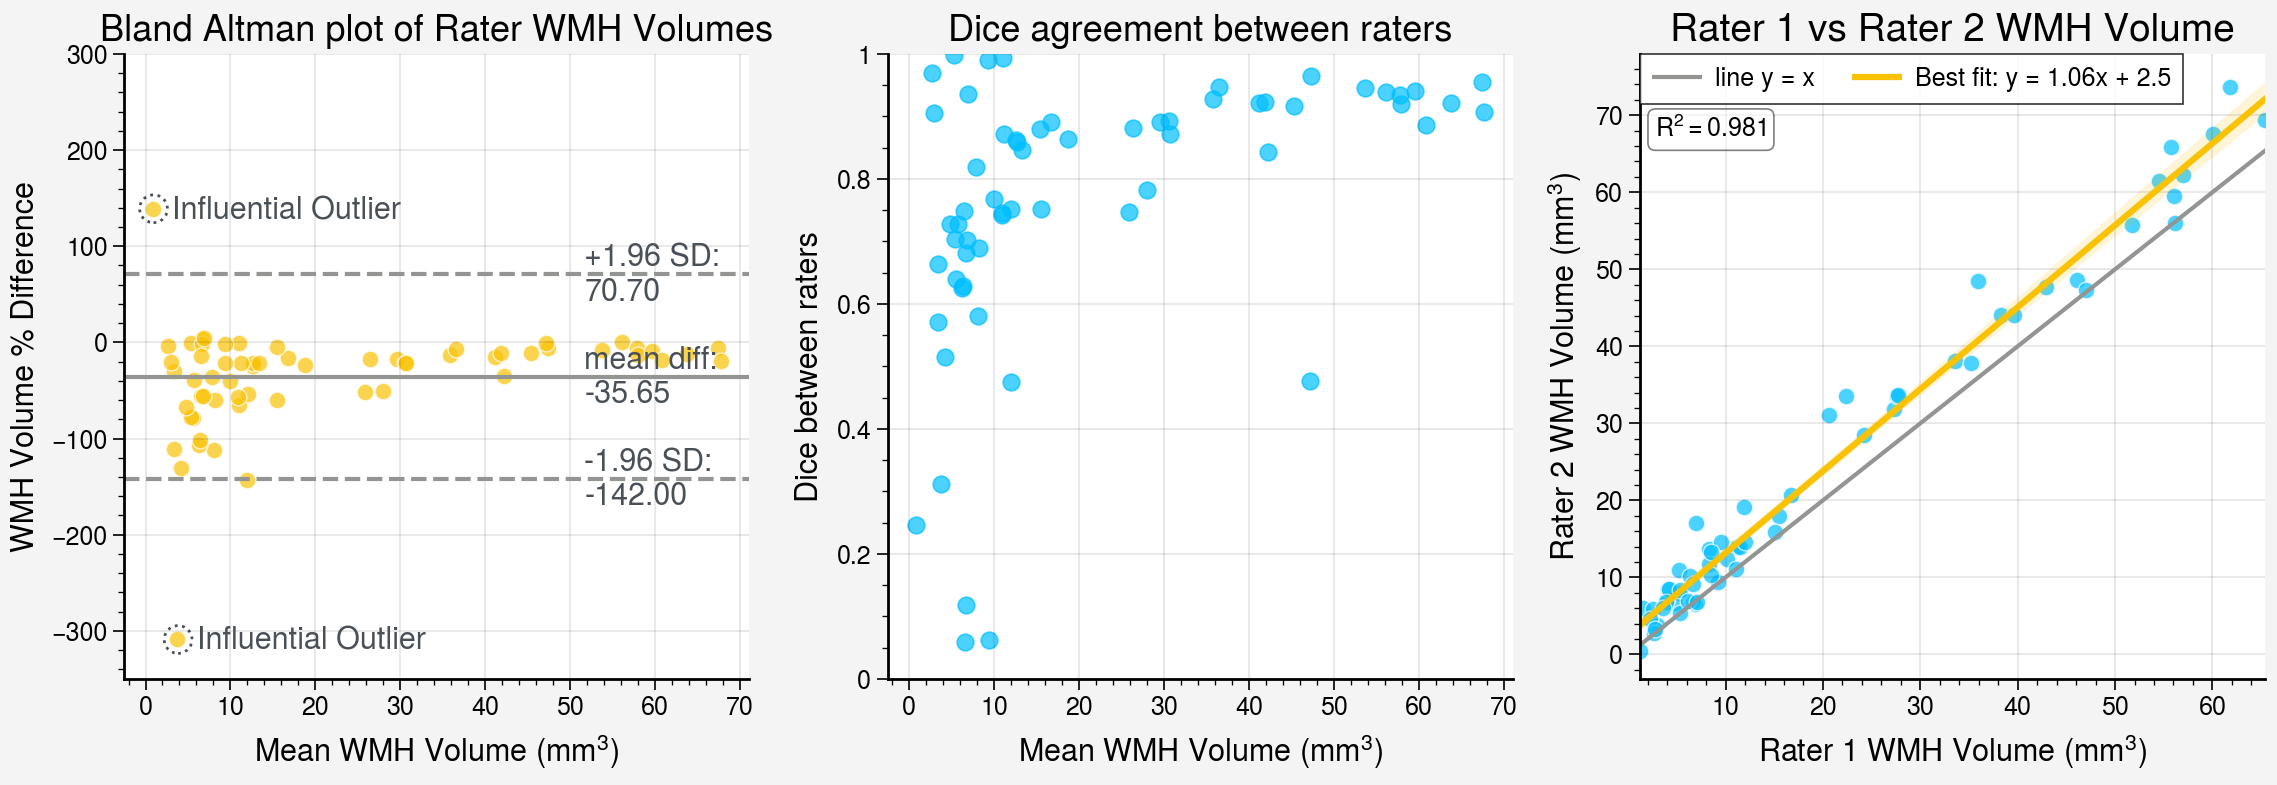

In [39]:
# spines and ticks
fig = pplt.figure(refwidth="25em", span=False, share=False)
axs = fig.subplots(nrows=1, ncols=3)

fontsize=11
scale = 0.001

x = df["WMH1_mm3"] * scale
y = df["WMH2_mm3"] * scale
bland_altman_plot(axs[0], x, y, fontsize)
axs[0].set_ylim((-350, 300))

y = df["DSC"]
x = (df["WMH1_mm3"] * scale + df["WMH2_mm3"] * scale) / 2
dice_agreement_plot(axs[1], x, y, fontsize)
axs[1].set_ylim((0, 1))

x = df["WMH1_mm3"].values * scale
y = df["WMH2_mm3"].values * scale
rater_volume_comparison(axs[2], x, y, fontsize)

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.)
    ax.spines['bottom'].set_linewidth(1.)
    plt.minorticks_on()
    ax.tick_params(axis='both', labelsize=fontsize-2)

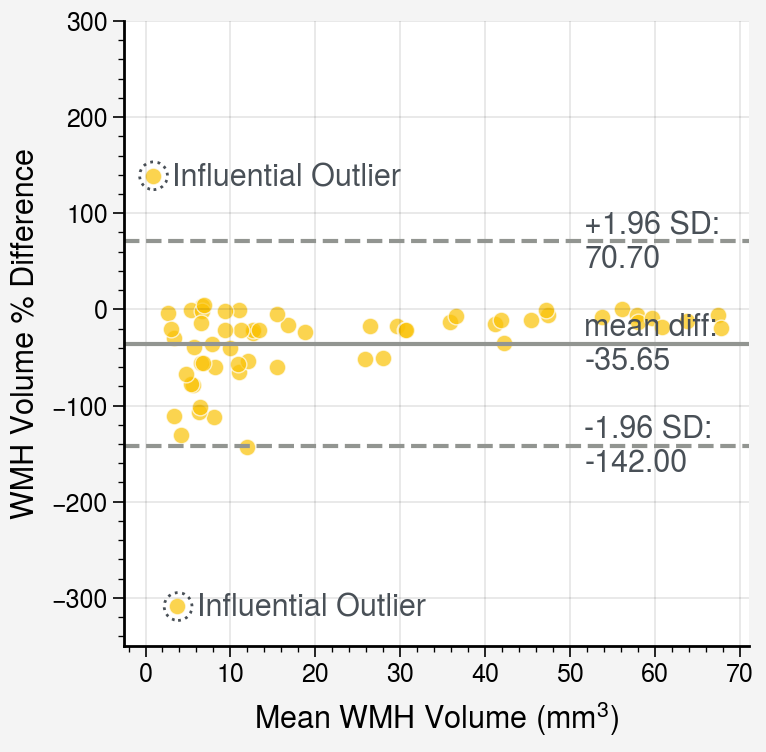

In [42]:
fig = pplt.figure(refwidth="25em", span=False, share=False)
axs = fig.subplots(nrows=1, ncols=1)

fontsize=11

x = df["WMH1_mm3"] * scale
y = df["WMH2_mm3"] * scale
bland_altman_plot(axs[0], x, y, fontsize, title=False)
axs[0].set_ylim((-350, 300))

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.)
    ax.spines['bottom'].set_linewidth(1.)
    plt.minorticks_on()
    ax.tick_params(axis='both', labelsize=fontsize-2)

fig.save("bland altman MSS3.pdf")